In [1]:
import json
import pandas

In [2]:
raw_incoming_transfers_dataframe = pandas.read_excel('data/royal_apothecary_incoming_transfer_packages_2021.xlsx', header=0)
raw_incoming_transfers_dataframe.columns

/Users/warren/venvs/bespoke/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Index(['date_type', 'transfer_row_id', 'delivery_row_id', 'package_row_id',
       'delivery_type', 'manifest_number', 'created_date',
       'shipper_facility_license_number', 'shipper_facility_name',
       'recipient_facility_license_number', 'recipient_facility_name',
       'shipment_type_name', 'shipment_transaction_type', 'package_id',
       'package_label', 'type', 'product_category_name', 'product_name',
       'shipper_wholesale_price', 'shipped_quantity', 'lab_results_status'],
      dtype='object')

In [3]:
raw_sales_transactions_dataframe = pandas.read_excel('data/royal_apothecary_sales_transactions_2021.xlsx', header=0)
raw_sales_transactions_dataframe.columns

Index(['date_type', 'id', 'receipt_id', 'receipt_number', 'receipt_type',
       'sales_customer_type', 'sales_datetime', 'total_packages',
       'total_price', 'tx_type', 'tx_package_id', 'tx_package_label',
       'tx_product_name', 'tx_product_category_name', 'tx_unit_of_measure',
       'tx_quantity_sold', 'tx_total_price'],
      dtype='object')

In [12]:
incoming_transfers_dataframe = raw_incoming_transfers_dataframe[[
#     'date_type',
#     'transfer_row_id',
#     'delivery_row_id',
#     'package_row_id',
    'delivery_type',
    'manifest_number',
    'created_date',
    'shipper_facility_license_number',
    'shipper_facility_name',
    'recipient_facility_license_number',
    'recipient_facility_name',
    'shipment_type_name',
    'shipment_transaction_type',
    'package_id',
    'package_label',
    'type',
    'product_category_name',
    'product_name',
    'shipper_wholesale_price',
    'shipped_quantity',
    'lab_results_status',
    # TODO: payload
]]
sales_transactions_dataframe = raw_sales_transactions_dataframe[[
#     'date_type',
#     'id',
    'receipt_id',
    'receipt_number',
    'receipt_type',
    'sales_customer_type',
    'sales_datetime', # IMPORTANT
    'total_packages',
    'total_price',
    'tx_type',
    'tx_package_id',
    'tx_package_label',
    'tx_product_name',
    'tx_product_category_name',
    'tx_unit_of_measure',
    'tx_quantity_sold',
    'tx_total_price',
]]
sales_transactions_dataframe = sales_transactions_dataframe.rename(columns={'tx_package_id': 'package_id'})

In [40]:
fn = lambda row: f'{row.shipper_facility_name} ({row.shipper_facility_license_number})'
col = incoming_transfers_dataframe.apply(fn, axis=1)
incoming_transfers_dataframe = incoming_transfers_dataframe.assign(shipper_facility=col.values)

In [41]:
incoming_transfers_dataframe

,delivery_type,manifest_number,created_date,shipper_facility_license_number,shipper_facility_name,recipient_facility_license_number,recipient_facility_name,shipment_type_name,shipment_transaction_type,package_id,package_label,type,product_category_name,product_name,shipper_wholesale_price,shipped_quantity,lab_results_status,shipper_facility
0,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,10549184.0,1A406030000CD7A000000024,transfer_incoming,Flower (packaged eighth - each),3.5g Jars Cosmic Ice Cream Cake,NaN,64.0,passed,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)"
1,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,10548777.0,1A406030000CD7A000000023,transfer_incoming,Pre-Roll Flower,.75g AVOG Pre-Roll,NaN,64.0,passed,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)"
2,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,10548772.0,1A406030000CD7A000000022,transfer_incoming,Pre-Roll Flower,.75g CICC Pre-Roll,NaN,64.0,passed,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)"
3,INCOMING_FROM_VENDOR,1435757.0,2021-01-08,C11-0001146-LIC,LCISM CORP,C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,10660333.0,1A406030000F99E000088407,transfer_incoming,Edible (weight - each),KIVA - Terra Bites Milk Chocolate Sea Salt Car...,220.0,20.0,passed,LCISM CORP (C11-0001146-LIC)
4,INCOMING_FROM_VENDOR,1435757.0,2021-01-08,C11-0001146-LIC,LCISM CORP,C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,10660336.0,1A406030000F99E000088410,transfer_incoming,Edible (weight - each),Camino Gummies Midnight Blueberry,540.0,60.0,passed,LCISM CORP (C11-0001146-LIC)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,INCOMING_FROM_VENDOR,2391513.0,2021-09-01,C11-0001071-LIC,"KDM HOLDINGS, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,17470280.0,1A406030000A429000098718,transfer_incoming,Vape Cartridge (volume - each),LIIIL - SFV OG Disposable - 0.5g,125.0,10.0,unknown,"KDM HOLDINGS, LLC (C11-0001071-LIC)"
2193,INCOMING_FROM_VENDOR,2391513.0,2021-09-01,C11-0001071-LIC,"KDM HOLDINGS, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,17470277.0,1A406030000A429000098717,transfer_incoming,Vape Cartridge (weight - each),LIIIL - King Louis XIII OG Disposable - 0.5g,125.0,10.0,unknown,"KDM HOLDINGS, LLC (C11-0001071-LIC)"
2194,INCOMING_FROM_VENDOR,2391513.0,2021-09-01,C11-0001071-LIC,"KDM HOLDINGS, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,17470276.0,1A406030000A429000098716,transfer_incoming,Vape Cartridge (weight - each),LIIIL - Blue Burst Disposable - 0.5g,125.0,10.0,unknown,"KDM HOLDINGS, LLC (C11-0001071-LIC)"
2195,INCOMING_FROM_VENDOR,2391513.0,2021-09-01,C11-0001071-LIC,"KDM HOLDINGS, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,17470290.0,1A406030000A429000098715,transfer_incoming,Vape Cartridge (weight - each),LIIIL - Strawberry Cough Disposable - 0.5g,125.0,10.0,unknown,"KDM HOLDINGS, LLC (C11-0001071-LIC)"


In [42]:
fn = lambda row: f'{row.sales_datetime.year}-{"0" if row.sales_datetime.month < 10 else ""}{row.sales_datetime.month}'
col = sales_transactions_dataframe.apply(fn, axis=1)
sales_transactions_dataframe = sales_transactions_dataframe.assign(sales_month=col.values)

In [43]:
sales_transactions_dataframe

,receipt_id,receipt_number,receipt_type,sales_customer_type,sales_datetime,total_packages,total_price,tx_type,package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,sales_month
0,70682699.0,70682699.0,active,Consumer,2021-01-02 09:58:35.860,1.0,15.3,active,10107839.0,1A4060300003D59000014639,Cali Flwr Farms - Cali Berry (3.5 GM Flower) (...,Flower,Grams,3.5,15.3,2021-01
1,70685535.0,70685535.0,active,Consumer,2021-01-02 10:18:18.930,1.0,18.0,active,9821095.0,1A4060300009FE9000020507,West Coast Treez - Dry Flower - INDICA - 3.5g ...,Flower,Grams,3.5,18.0,2021-01
2,70685842.0,70685842.0,active,Consumer,2021-01-02 10:20:21.890,2.0,72.0,active,9813136.0,1A406030000A3C3000028651,Cookies | Red Vines | 1g | Flower | Indoor | Bag,Flower (packaged gram - each),Each,1.0,16.2,2021-01
3,70685842.0,70685842.0,active,Consumer,2021-01-02 10:20:21.890,2.0,72.0,active,9812957.0,1A406030000A3C3000028648,Lemonnade | NYC Haze | 3.5g | Flower | Indoor,Flower (packaged eighth - each),Each,1.0,55.8,2021-01
4,70686157.0,70686157.0,active,Consumer,2021-01-02 10:22:29.860,1.0,5.4,active,10107769.0,1A4060300003D59000014640,Cali Flwr Farms - Cali Gas OG (1 GM Flower) (#...,Flower,Grams,1.0,5.4,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52877,126049081.0,126049081.0,active,Consumer,2021-08-31 20:28:12.810,1.0,48.6,active,17262241.0,1A4060300006023000095961,Korova Flower - Alien Apple Fritter - 3.5g / C...,Flower (packaged eighth - each),Each,1.0,48.6,2021-08
52878,126049986.0,126049986.0,active,Patient,2021-08-31 20:32:15.290,2.0,41.4,active,15523657.0,1A406030000601A000217581,Farmer and the Felon Rolls Choice A Flower (1/...,Flower (packaged eighth - each),Each,1.0,28.8,2021-08
52879,126049986.0,126049986.0,active,Patient,2021-08-31 20:32:15.290,2.0,41.4,active,11086639.0,1A406030000339A000009332,Kosher Dawg 1g,Flower (packaged gram - each),Each,1.0,12.6,2021-08
52880,126051478.0,126051478.0,active,Consumer,2021-08-31 20:38:37.890,1.0,20.0,active,16656393.0,1A4060300003D59000018288,Rich & Ruthless - CPT Magic (SMALLS) (3.5 GM F...,Flower (packaged eighth - each),Each,2.0,20.0,2021-08


In [44]:
result_dataframe = incoming_transfers_dataframe.set_index('package_id').join(sales_transactions_dataframe.set_index('package_id'), on='package_id', how='inner', lsuffix='_l', rsuffix='_r')
result_dataframe

,delivery_type,manifest_number,created_date,shipper_facility_license_number,shipper_facility_name,recipient_facility_license_number,recipient_facility_name,shipment_type_name,shipment_transaction_type,package_label,...,total_packages,total_price,tx_type,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,sales_month
package_id,,,,,,,,,,,,,,,,,,,,,
10549184.0,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,1A406030000CD7A000000024,...,1.0,22.80,active,1A406030000CD7A000000024,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,22.8,2021-01
10549184.0,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,1A406030000CD7A000000024,...,7.0,179.35,active,1A406030000CD7A000000024,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,32.3,2021-01
10549184.0,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,1A406030000CD7A000000024,...,3.0,65.70,active,1A406030000CD7A000000024,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,34.2,2021-01
10549184.0,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,1A406030000CD7A000000024,...,2.0,35.10,active,1A406030000CD7A000000024,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,34.2,2021-01
10549184.0,INCOMING_FROM_VENDOR,1421236.0,2021-01-05,C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Transfer,Standard,1A406030000CD7A000000024,...,4.0,97.01,active,1A406030000CD7A000000024,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,38.0,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17084257.0,INCOMING_FROM_VENDOR,2350514.0,2021-08-23,C12-0000244-LIC,"SEED 2 SOUL, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,1A4060300007D04000009614,...,6.0,97.35,active,1A4060300007D04000009614,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,11.0,2021-08
17084257.0,INCOMING_FROM_VENDOR,2350514.0,2021-08-23,C12-0000244-LIC,"SEED 2 SOUL, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,1A4060300007D04000009614,...,7.0,167.45,active,1A4060300007D04000009614,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,17.0,2021-08
17084242.0,INCOMING_FROM_VENDOR,2350514.0,2021-08-23,C12-0000244-LIC,"SEED 2 SOUL, LLC",C10-0000596-LIC,ROYAL APOTHECARY L.L.C.,Wholesale Manifest,Wholesale,1A4060300007D04000009612,...,4.0,82.00,active,1A4060300007D04000009612,Cheeba Chews - Sleepy Time - Chocolate - 20 pack,Edible (weight - each),Each,1.0,15.0,2021-08


In [45]:
result_dataframe.columns

Index(['delivery_type', 'manifest_number', 'created_date',
       'shipper_facility_license_number', 'shipper_facility_name',
       'recipient_facility_license_number', 'recipient_facility_name',
       'shipment_type_name', 'shipment_transaction_type', 'package_label',
       'type', 'product_category_name', 'product_name',
       'shipper_wholesale_price', 'shipped_quantity', 'lab_results_status',
       'shipper_facility', 'receipt_id', 'receipt_number', 'receipt_type',
       'sales_customer_type', 'sales_datetime', 'total_packages',
       'total_price', 'tx_type', 'tx_package_label', 'tx_product_name',
       'tx_product_category_name', 'tx_unit_of_measure', 'tx_quantity_sold',
       'tx_total_price', 'sales_month'],
      dtype='object')

In [46]:
limited_result_dataframe = result_dataframe[[
#     'manifest_number',
    'package_label',
    'created_date',
    'shipper_facility',
    'shipper_facility_license_number',
    'shipper_facility_name',
    'shipped_quantity',
    'sales_datetime',
    'sales_month',
    'tx_product_name',
    'tx_product_category_name',
    'tx_unit_of_measure',
    'tx_quantity_sold',
    'tx_total_price',
]]
limited_result_dataframe

,package_label,created_date,shipper_facility,shipper_facility_license_number,shipper_facility_name,shipped_quantity,sales_datetime,sales_month,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price
package_id,,,,,,,,,,,,,
10549184.0,1A406030000CD7A000000024,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01-05 18:23:07.860,2021-01,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,22.8
10549184.0,1A406030000CD7A000000024,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01-06 13:59:05.120,2021-01,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,32.3
10549184.0,1A406030000CD7A000000024,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01-06 20:39:02.440,2021-01,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,34.2
10549184.0,1A406030000CD7A000000024,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01-07 14:15:49.880,2021-01,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,34.2
10549184.0,1A406030000CD7A000000024,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01-07 14:17:42.990,2021-01,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17084257.0,1A4060300007D04000009614,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",30.0,2021-08-29 18:13:33.090,2021-08,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,11.0
17084257.0,1A4060300007D04000009614,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",30.0,2021-08-31 11:53:02.440,2021-08,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,17.0
17084242.0,1A4060300007D04000009612,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",20.0,2021-08-25 16:27:16.900,2021-08,Cheeba Chews - Sleepy Time - Chocolate - 20 pack,Edible (weight - each),Each,1.0,15.0


In [47]:
filter_by_product_name = limited_result_dataframe['tx_product_name'] == '3.5g Jars Cosmic Ice Cream Cake'
filtered_result_dataframe = limited_result_dataframe[filter_by_product_name]
filtered_result_dataframe

,package_label,created_date,shipper_facility,shipper_facility_license_number,shipper_facility_name,shipped_quantity,sales_datetime,sales_month,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price
package_id,,,,,,,,,,,,,
10549184.0,1A406030000CD7A000000024,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01-05 18:23:07.860,2021-01,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,22.80
10549184.0,1A406030000CD7A000000024,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01-06 13:59:05.120,2021-01,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,32.30
10549184.0,1A406030000CD7A000000024,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01-06 20:39:02.440,2021-01,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,34.20
10549184.0,1A406030000CD7A000000024,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01-07 14:15:49.880,2021-01,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,34.20
10549184.0,1A406030000CD7A000000024,2021-01-05,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",64.0,2021-01-07 14:17:42.990,2021-01,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,38.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13384879.0,1A406030000CD7A000000028,2021-04-14,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",130.0,2021-06-09 12:28:51.390,2021-06,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,27.00
13384879.0,1A406030000CD7A000000028,2021-04-14,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",130.0,2021-06-10 13:02:49.440,2021-06,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,27.00
13384879.0,1A406030000CD7A000000028,2021-04-14,"GREEN EARTH OPERATIONS, INC. (C11-0001106-LIC)",C11-0001106-LIC,"GREEN EARTH OPERATIONS, INC.",130.0,2021-06-10 16:08:13.550,2021-06,3.5g Jars Cosmic Ice Cream Cake,Flower (packaged eighth - each),Each,1.0,0.01


In [48]:
records = filtered_result_dataframe[['package_label', 'created_date', 'shipped_quantity', 'sales_datetime', 'tx_quantity_sold']].to_records(index=False)
result = list(records)
result

[('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-05T18:23:07.860000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-06T13:59:05.120000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-06T20:39:02.440000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-07T14:15:49.880000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-07T14:17:42.990000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-07T16:30:13.890000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-07T16:48:43.910000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-07T17:17:12.390000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:00:00.000000000', 64., '2021-01-08T13:52:00.920000000', 1.),
 ('1A406030000CD7A000000024', '2021-01-05T00:0

In [49]:
filter_by_date = limited_result_dataframe['sales_month'] == '2021-08'
filtered_result_dataframe = limited_result_dataframe[filter_by_date]
filtered_result_dataframe

,package_label,created_date,shipper_facility,shipper_facility_license_number,shipper_facility_name,shipped_quantity,sales_datetime,sales_month,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price
package_id,,,,,,,,,,,,,
10870147.0,1A40603000062D7000000164,2021-01-18,"ANAT GROUP, INC. (C11-0000385-LIC)",C11-0000385-LIC,"ANAT GROUP, INC.",560.0,2021-08-01 20:41:57.500,2021-08,Rich & Ruthless - CPT Sugar (3.5 GM Flower) (#...,Flower,Grams,3.5,18.0
11004270.0,1A4060300005E8C000006166,2021-01-22,VARAVO (C11-0000582-LIC),C11-0000582-LIC,VARAVO,108.0,2021-08-07 16:44:51.130,2021-08,Kushy Punch Hybrid Gummy 100mg,Edible (weight - each),Each,1.0,1.0
10772696.0,1A4060300005BD4000007422,2021-01-13,GOLD COAST ENTERPRISES (C11-0000587-LIC),C11-0000587-LIC,GOLD COAST ENTERPRISES,20.0,2021-08-01 10:29:25.610,2021-08,Pre-Roll Infused - 1g - Indica - DosiDoze,Pre-Roll Infused,Each,1.0,13.5
10533406.0,1A406030000A3C3000033433,2021-01-18,SOUTHWEST CAREGIVERS INC. (C12-0000164-LIC),C12-0000164-LIC,SOUTHWEST CAREGIVERS INC.,30.0,2021-08-05 11:24:05.660,2021-08,Grandiflora | High-Tech 2 | 1g | Pre-Rolled Jo...,Pre-Roll Flower,Each,1.0,15.3
10528066.0,1A4060300006027000059143,2021-01-05,"WCC MGMT, LLC (C11-0000512-LIC)",C11-0000512-LIC,"WCC MGMT, LLC",15.0,2021-08-20 17:03:44.680,2021-08,Lemon Cooler - 0.5g CUREpod,Vape Cartridge (weight - each),Each,1.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17084257.0,1A4060300007D04000009614,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",30.0,2021-08-29 18:13:33.090,2021-08,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,11.0
17084257.0,1A4060300007D04000009614,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",30.0,2021-08-31 11:53:02.440,2021-08,Green Hornet - Hybrid - Green Apple - 10 pack,Edible (weight - each),Each,1.0,17.0
17084242.0,1A4060300007D04000009612,2021-08-23,"SEED 2 SOUL, LLC (C12-0000244-LIC)",C12-0000244-LIC,"SEED 2 SOUL, LLC",20.0,2021-08-25 16:27:16.900,2021-08,Cheeba Chews - Sleepy Time - Chocolate - 20 pack,Edible (weight - each),Each,1.0,15.0


<AxesSubplot:xlabel='shipper_facility'>

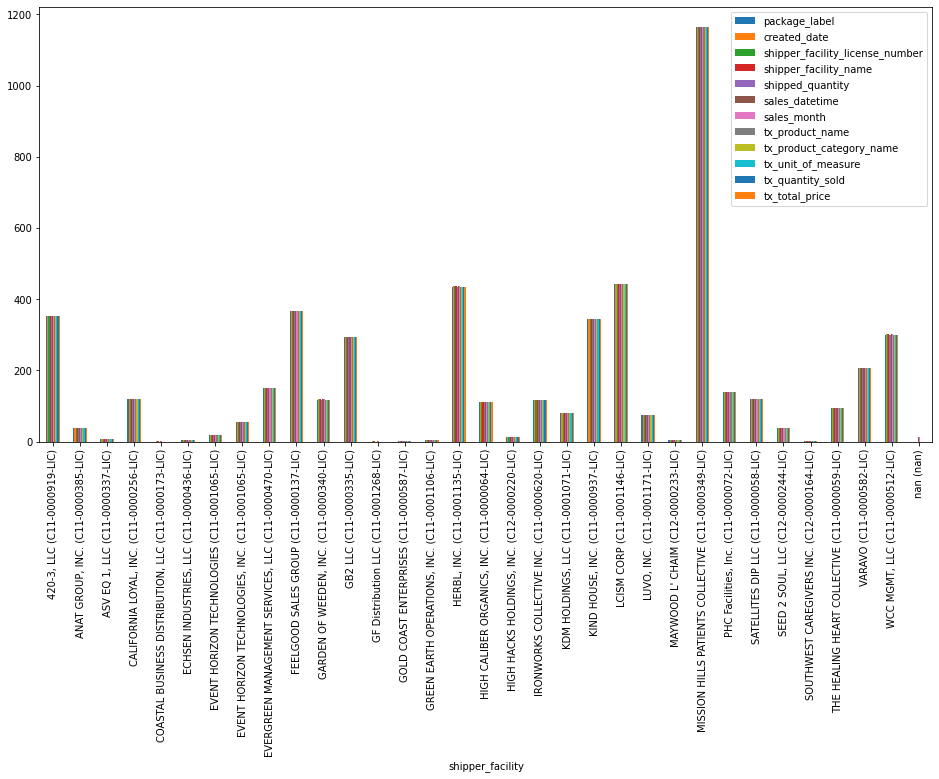

In [54]:
filtered_result_dataframe.groupby('shipper_facility').count().plot(figsize=(16, 8), kind='bar')
# gym.groupby('height_m').count().plot()

<AxesSubplot:xlabel='shipper_facility'>

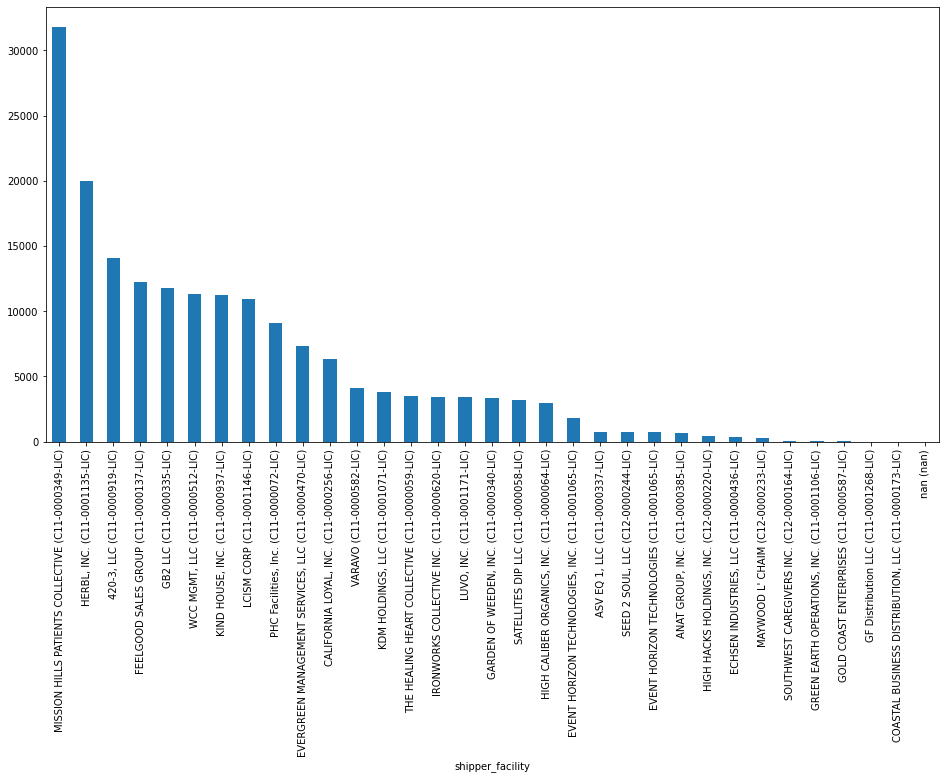

In [56]:
filtered_result_dataframe.groupby('shipper_facility')['tx_total_price'].sum().sort_values(ascending=False).plot(figsize=(16, 8), kind='bar')

In [61]:
filter_by_date_and_shipper_facility_name = (limited_result_dataframe['sales_month'] == '2021-08') & (limited_result_dataframe['shipper_facility_name'] == 'MISSION HILLS PATIENTS COLLECTIVE')
filtered_result_dataframe = limited_result_dataframe[filter_by_date_and_shipper_facility_name]
filtered_result_dataframe

,package_label,created_date,shipper_facility,shipper_facility_license_number,shipper_facility_name,shipped_quantity,sales_datetime,sales_month,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price
package_id,,,,,,,,,,,,,
15323102.0,1A4060300003D59000017097,2021-06-21,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,30.0,2021-08-20 17:53:56.520,2021-08,Cali Flwr Farms - Mixed Berry Gummies (66 GM E...,Edible (weight - each),Each,1.0,10.0
15322786.0,1A4060300003D59000017092,2021-06-21,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,12.0,2021-08-12 15:52:26.280,2021-08,Cali Flwr Farms - Cali Secret (28 GM Flower (E...,Flower (packaged ounce - each),Each,1.0,126.0
15322784.0,1A4060300003D59000017091,2021-06-21,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,30.0,2021-08-09 12:30:37.110,2021-08,Cali Flwr Farms - Cali Secret (1 GM Flower (Ea...,Flower (packaged gram - each),Each,1.0,8.0
15322784.0,1A4060300003D59000017091,2021-06-21,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,30.0,2021-08-09 17:02:05.330,2021-08,Cali Flwr Farms - Cali Secret (1 GM Flower (Ea...,Flower (packaged gram - each),Each,1.0,6.8
15322787.0,1A4060300003D59000017093,2021-06-21,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,120.0,2021-08-02 16:28:39.680,2021-08,Cali Flwr Farms - Cali Secret (3.5 GM Flower (...,Flower (packaged eighth - each),Each,1.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17269732.0,1A4060300003D59000019144,2021-08-25,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,20.0,2021-08-27 17:49:07.300,2021-08,Viva Sativa - Viva Fuego (14.0 GM Flower (Each...,Flower (packaged half ounce - each),Each,1.0,72.0
17269732.0,1A4060300003D59000019144,2021-08-25,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,20.0,2021-08-28 16:28:44.160,2021-08,Viva Sativa - Viva Fuego (14.0 GM Flower (Each...,Flower (packaged half ounce - each),Each,1.0,72.0
17269731.0,1A4060300003D59000019143,2021-08-25,MISSION HILLS PATIENTS COLLECTIVE (C11-0000349...,C11-0000349-LIC,MISSION HILLS PATIENTS COLLECTIVE,30.0,2021-08-27 20:36:07.980,2021-08,Viva Sativa - Viva Fuego (1 GM Flower (Each)) ...,Flower (packaged gram - each),Each,1.0,6.0


<AxesSubplot:xlabel='tx_product_name'>

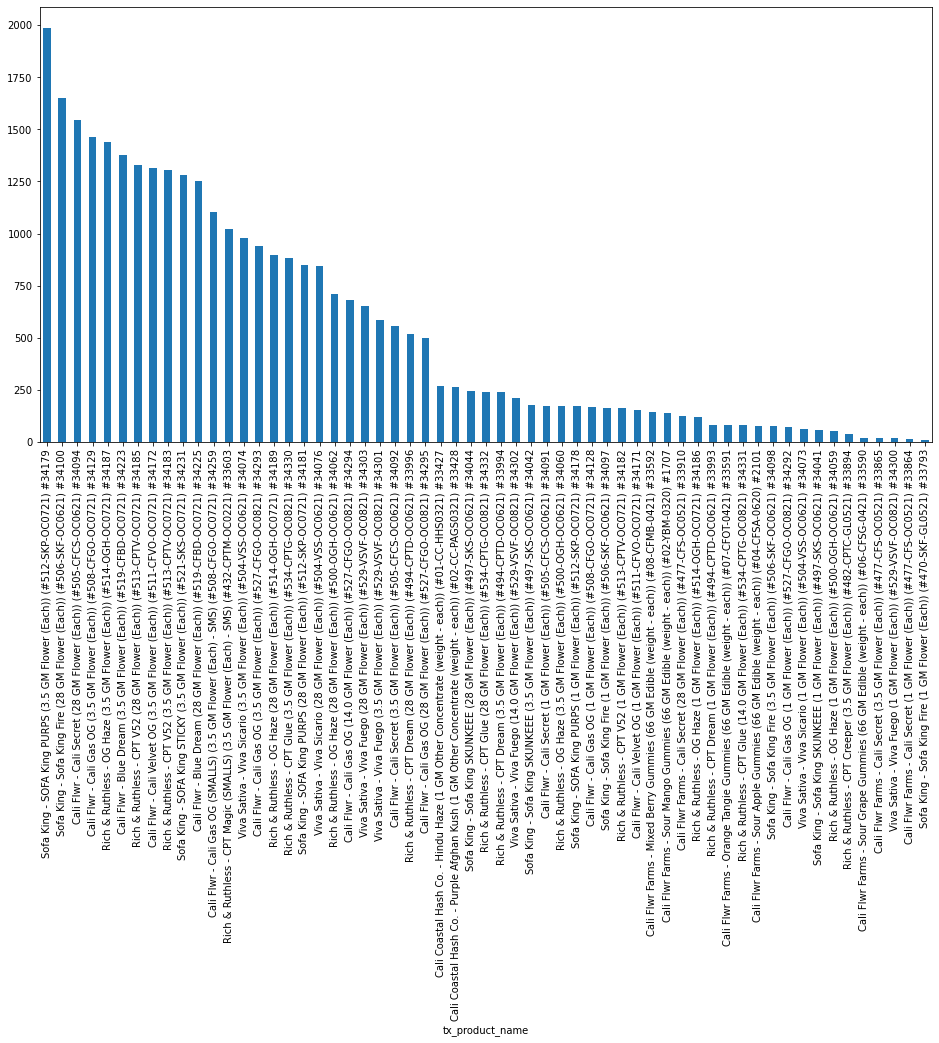

In [64]:
filtered_result_dataframe.groupby('tx_product_name')['tx_total_price'].sum().sort_values(ascending=False).plot(figsize=(16, 8), kind='bar')

In [5]:
pandas.set_option('display.max_rows', 10)
fn = lambda row: f'{row.date.year}-{"0" if row.date.month < 10 else ""}{row.date.month}'
col = dataframe.apply(fn, axis=1)
dataframe = dataframe.assign(month=col.values)
dataframe

,license_number,ar_account,bal_out,current,30_days,60_days,90_days,over_90_days,date,client,roll_up_id,month
0,0,A&A Global Imports Inc,1600.78,72.69,1514.67,13.42,0.00,0.0,2020-09-30,Abstrax Tech,NaN,2020-09
1,0,A&A Global Imports Inc,1786.38,0.00,1489.45,17.79,279.14,0.0,2020-12-28,Abstrax Tech,NaN,2020-12
2,0,ABX SALES,150.00,0.00,0.00,150.00,0.00,0.0,2020-09-30,Abstrax Tech,NaN,2020-09
3,C11-0000305-LIC,Ahmad Rafii,15.36,0.00,0.00,15.36,0.00,0.0,2020-12-28,Abstrax Tech,CA-01173,2020-12
4,0,Ajan Chima,198.00,0.00,198.00,0.00,0.00,0.0,2020-12-28,Abstrax Tech,NaN,2020-12
...,...,...,...,...,...,...,...,...,...,...,...,...
31746,CDPH-10003642,"Herbarium LA (The Little Cottage Caregivers,LLC)",4866.65,4866.65,0.00,0.00,0.00,0.0,2020-04-09,ZRP Group,CA-03689,2020-04
31747,C10-0000606-LIC,Kannabis Works,6380.33,6380.33,0.00,0.00,0.00,0.0,2020-04-09,ZRP Group,CA-01982,2020-04
31748,C10-0000346-LIC,Stiizy (Ironworks Collective Inc.),2200.01,2200.01,0.00,0.00,0.00,0.0,2020-04-09,ZRP Group,CA-01955,2020-04
31749,C10-0000595-LIC,"The Living Earth Wellness Center Collective, I...",1162.00,0.00,1162.00,0.00,0.00,0.0,2020-04-09,ZRP Group,CA-03690,2020-04


In [6]:
filter_by_roll_up_id = dataframe['license_number'] != 0
filtered_dataframe = dataframe[filter_by_roll_up_id]
filtered_dataframe

,license_number,ar_account,bal_out,current,30_days,60_days,90_days,over_90_days,date,client,roll_up_id,month
3,C11-0000305-LIC,Ahmad Rafii,15.36,0.00,0.00,15.36,0.00,0.0,2020-12-28,Abstrax Tech,CA-01173,2020-12
18,C10-0000559-LIC,Buddha Co,89.93,0.00,0.00,0.00,89.93,0.0,2020-06-30,Abstrax Tech,CA-00648,2020-06
19,C10-0000559-LIC,Buddha Co,89.93,0.00,0.00,0.00,89.93,0.0,2020-09-30,Abstrax Tech,CA-00648,2020-09
20,C10-0000559-LIC,Buddha Co,89.93,0.00,0.00,0.00,89.93,0.0,2020-12-28,Abstrax Tech,CA-00648,2020-12
22,C9-0000034-LIC,Caliva,12.23,0.00,12.23,0.00,0.00,0.0,2020-06-30,Abstrax Tech,CA-00592,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...
31746,CDPH-10003642,"Herbarium LA (The Little Cottage Caregivers,LLC)",4866.65,4866.65,0.00,0.00,0.00,0.0,2020-04-09,ZRP Group,CA-03689,2020-04
31747,C10-0000606-LIC,Kannabis Works,6380.33,6380.33,0.00,0.00,0.00,0.0,2020-04-09,ZRP Group,CA-01982,2020-04
31748,C10-0000346-LIC,Stiizy (Ironworks Collective Inc.),2200.01,2200.01,0.00,0.00,0.00,0.0,2020-04-09,ZRP Group,CA-01955,2020-04
31749,C10-0000595-LIC,"The Living Earth Wellness Center Collective, I...",1162.00,0.00,1162.00,0.00,0.00,0.0,2020-04-09,ZRP Group,CA-03690,2020-04


In [7]:
filter_by_client = filtered_dataframe['client'] == 'Voyage Distribution'
# filter_by_client = filtered_dataframe['client'] == 'ZRP Group'
voyage_dataframe = filtered_dataframe[filter_by_client]
voyage_dataframe

,license_number,ar_account,bal_out,current,30_days,60_days,90_days,over_90_days,date,client,roll_up_id,month
31417,C10-0000549-LIC,(HHA) Holistic Healing Alternative (DBA - Gree...,0.00,0.00,0.00,0.0,0.0,0.0,2021-01-31,Voyage Distribution,CA-01766,2021-01
31418,C10-0000549-LIC,(HHA) Holistic Healing Alternative (DBA - Gree...,0.00,0.00,0.00,0.0,0.0,0.0,2021-02-28,Voyage Distribution,CA-01766,2021-02
31419,C10-0000549-LIC,(HHA) Holistic Healing Alternative (DBA - Gree...,0.00,0.00,0.00,0.0,0.0,0.0,2021-03-31,Voyage Distribution,CA-01766,2021-03
31420,C10-0000549-LIC,(HHA) Holistic Healing Alternative (DBA - Gree...,0.00,0.00,0.00,0.0,0.0,0.0,2021-04-30,Voyage Distribution,CA-01766,2021-04
31421,C10-0000549-LIC,(HHA) Holistic Healing Alternative (DBA - Gree...,0.00,0.00,0.00,0.0,0.0,0.0,2021-05-31,Voyage Distribution,CA-01766,2021-05
...,...,...,...,...,...,...,...,...,...,...,...,...
31715,C12-0000266-LIC,"Westside Caregivers Club, Inc. dba dosist",0.00,0.00,0.00,0.0,0.0,0.0,2021-04-30,Voyage Distribution,CA-04004,2021-04
31716,C12-0000266-LIC,"Westside Caregivers Club, Inc. dba dosist",0.00,0.00,0.00,0.0,0.0,0.0,2021-05-31,Voyage Distribution,CA-04004,2021-05
31717,C12-0000052-LIC,"Zenganic, Inc",0.02,0.02,0.00,0.0,0.0,0.0,2021-03-31,Voyage Distribution,CA-04099,2021-03
31718,C12-0000052-LIC,"Zenganic, Inc",0.02,0.02,0.00,0.0,0.0,0.0,2021-04-30,Voyage Distribution,CA-04099,2021-04


In [8]:
voyage_dataframe = voyage_dataframe.sort_values(by=['date', 'ar_account'], ascending=False)
voyage_dataframe

,license_number,ar_account,bal_out,current,30_days,60_days,90_days,over_90_days,date,client,roll_up_id,month
31719,C12-0000052-LIC,"Zenganic, Inc",0.02,0.00,0.02,0.00,0.00,0.00,2021-05-31,Voyage Distribution,CA-04099,2021-05
31716,C12-0000266-LIC,"Westside Caregivers Club, Inc. dba dosist",0.00,0.00,0.00,0.00,0.00,0.00,2021-05-31,Voyage Distribution,CA-04004,2021-05
31711,C12-0000077-LIC,"Westside Caregivers Club, Inc.",3244.99,1480.82,365.58,980.94,417.65,0.00,2021-05-31,Voyage Distribution,CA-04004,2021-05
31704,C10-0000761-LIC,"Varda, Inc.",1520.37,0.00,0.00,0.00,0.00,1520.37,2021-05-31,Voyage Distribution,CA-05360,2021-05
31699,C12-0000039-LIC,"VALLEY HERBAL HEALING CENTER, INC.",6394.26,0.00,0.00,3056.73,2.79,3334.74,2021-05-31,Voyage Distribution,CA-02889,2021-05
...,...,...,...,...,...,...,...,...,...,...,...,...
31453,C12-0000237-LIC,"BW Macaw Group, Inc.",14031.83,6569.08,7462.75,0.00,0.00,0.00,2021-01-31,Voyage Distribution,CA-00505,2021-01
31444,C9-0000322-LIC,BECC Holdings,17270.40,0.00,17270.40,0.00,0.00,0.00,2021-01-31,Voyage Distribution,CA-04111,2021-01
31435,C10-0000053-LIC,"BCOK, INC.",1584.96,0.00,0.00,0.00,1584.96,0.00,2021-01-31,Voyage Distribution,CA-00335,2021-01
31425,C10-0000279-LIC,99 HIGHTIDE COLLECTIVE,1173.46,1173.46,0.00,0.00,0.00,0.00,2021-01-31,Voyage Distribution,CA-00095,2021-01


In [9]:
# Group by date (month, to be specific) and view how many data points we have per client per month
voyage_dataframe.groupby(['month']).count()

,license_number,ar_account,bal_out,current,30_days,60_days,90_days,over_90_days,date,client,roll_up_id
month,,,,,,,,,,,
2021-01,37,37,37,37,37,37,37,37,37,37,37
2021-02,39,39,39,39,39,39,39,39,39,39,39
2021-03,45,45,45,45,45,45,45,45,45,45,45
2021-04,71,71,71,71,71,71,71,71,71,71,71
2021-05,74,74,74,74,74,74,74,74,74,74,74


In [10]:
filter_by_date = dataframe['month'] == '2021-05'
voyage_date_dataframe = voyage_dataframe[filter_by_date]

/Users/warren/venvs/bespoke/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [11]:
pandas.set_option('display.max_rows', None)
voyage_date_dataframe

,license_number,ar_account,bal_out,current,30_days,60_days,90_days,over_90_days,date,client,roll_up_id,month
31719,C12-0000052-LIC,"Zenganic, Inc",0.02,0.00,0.02,0.00,0.00,0.00,2021-05-31,Voyage Distribution,CA-04099,2021-05
31716,C12-0000266-LIC,"Westside Caregivers Club, Inc. dba dosist",0.00,0.00,0.00,0.00,0.00,0.00,2021-05-31,Voyage Distribution,CA-04004,2021-05
31711,C12-0000077-LIC,"Westside Caregivers Club, Inc.",3244.99,1480.82,365.58,980.94,417.65,0.00,2021-05-31,Voyage Distribution,CA-04004,2021-05
31704,C10-0000761-LIC,"Varda, Inc.",1520.37,0.00,0.00,0.00,0.00,1520.37,2021-05-31,Voyage Distribution,CA-05360,2021-05
31699,C12-0000039-LIC,"VALLEY HERBAL HEALING CENTER, INC.",6394.26,0.00,0.00,3056.73,2.79,3334.74,2021-05-31,Voyage Distribution,CA-02889,2021-05
31694,C10-0000570-LIC,Tradecraft,0.08,0.00,0.00,0.08,0.00,0.00,2021-05-31,Voyage Distribution,CA-02331,2021-05
31692,C10-0000115-LIC,The Spot,0.08,0.00,0.00,0.08,0.00,0.00,2021-05-31,Voyage Distribution,CA-00057,2021-05
31688,C10-0000056-LIC,"THE GREEN GODDESS, INC.",2373.70,740.41,645.41,987.88,0.00,0.00,2021-05-31,Voyage Distribution,CA-03650,2021-05
31683,C10-0000213-LIC,THCSD,0.08,0.00,0.00,0.08,0.00,0.00,2021-05-31,Voyage Distribution,CA-03659,2021-05
31681,C10-0000359-LIC,Sweetflower Westwood,6828.47,0.00,1270.38,0.00,1.52,5556.57,2021-05-31,Voyage Distribution,CA-02889,2021-05


In [12]:
pandas.set_option('display.max_rows', 10)

In [13]:
voyage_date_dataframe.sum()

license_number    C12-0000052-LICC12-0000266-LICC12-0000077-LICC...
ar_account        Zenganic, IncWestside Caregivers Club, Inc. db...
bal_out                                                    135731.6
current                                                    23812.15
30_days                                                     7449.87
                                        ...                        
90_days                                                      421.96
over_90_days                                               86016.88
client            Voyage DistributionVoyage DistributionVoyage D...
roll_up_id        CA-04099CA-04004CA-04004CA-05360CA-02889CA-023...
month             2021-052021-052021-052021-052021-052021-052021...
Length: 11, dtype: object

In [14]:
# As of 05/31/21 financials, based on the data Voyage is owed $135,731.6.
# $23,812.15 is current, $7,449.87 is 30 days, $18,030.74 is 60 days, $421.96 is 90 days, and $86,01.88 is over 90 days.
# The fact that > 50% of the $ owed to Voyage is over 90 days seems concerning??

In [15]:
sum_dataframe = voyage_date_dataframe.sum()
sum_dataframe[[
    'bal_out',
    'current',
    '30_days',
    '60_days',
    'over_90_days',
]].to_json()

'{"bal_out":135731.6,"current":23812.15,"30_days":7449.87,"60_days":18030.74,"over_90_days":86016.88}'

In [16]:
# All of the above put into one re-usable function

In [32]:
def get_agg_data_by_client_and_month(client_name, month):
    filter_by_client = filtered_dataframe['client'] == client_name
    dataframe = filtered_dataframe[filter_by_client]
    filter_by_month = dataframe['month'] == month
    dataframe = dataframe[filter_by_month]
    number_of_entries = len(dataframe)
    sum_dataframe = dataframe.sum()
    result = json.loads(sum_dataframe[[
        'bal_out',
        'current',
        '30_days',
        '60_days',
        'over_90_days',
    ]].to_json())
    result['bal_out'] = round(result['bal_out'], 2)
    result['current'] = round(result['current'], 2)
    result['30_days'] = round(result['30_days'], 2)
    result['60_days'] = round(result['60_days'], 2)
    result['over_90_days'] = round(result['over_90_days'], 2)
    result['row_count'] = number_of_entries
    return result

def get_agg_data_by_client(client_name, all_months):
    results = []
    
    for month in all_months:
        if '2021' not in month:
            # Skip non-2021 years for now.
            continue
        agg_data_by_month = get_agg_data_by_client_and_month(client_name, month)
        agg_data_by_month['month'] = month
        results += [agg_data_by_month]
    
    return results

In [33]:
all_client_names = sorted(list(filtered_dataframe.client.unique()))
all_dates = sorted(list(filtered_dataframe.date.unique()))
all_months = sorted(list(filtered_dataframe.month.unique()))

In [34]:
len(all_client_names), all_client_names[:10]

(146,
 ['Abstrax Tech',
  'Accentian',
  'AgTek Enterprises',
  'Apex',
  'Ashland Productions',
  'Aster Farms',
  'Attitude Adjustment Inc',
  'Aureum Labs',
  'BMG VENTURES, INC',
  'Bear Extracts'])

In [35]:
len(all_dates), all_dates[-10:]

(99,
 [numpy.datetime64('2021-02-28T00:00:00.000000000'),
  numpy.datetime64('2021-03-03T00:00:00.000000000'),
  numpy.datetime64('2021-03-22T00:00:00.000000000'),
  numpy.datetime64('2021-03-31T00:00:00.000000000'),
  numpy.datetime64('2021-04-01T00:00:00.000000000'),
  numpy.datetime64('2021-04-02T00:00:00.000000000'),
  numpy.datetime64('2021-04-15T00:00:00.000000000'),
  numpy.datetime64('2021-04-30T00:00:00.000000000'),
  numpy.datetime64('2021-05-01T00:00:00.000000000'),
  numpy.datetime64('2021-05-31T00:00:00.000000000')])

In [36]:
len(all_months), all_months[-10:]

(33,
 ['2020-08',
  '2020-09',
  '2020-10',
  '2020-11',
  '2020-12',
  '2021-01',
  '2021-02',
  '2021-03',
  '2021-04',
  '2021-05'])

In [88]:
client_agg_data_tuples = [(client_name, get_agg_data_by_client(client_name, all_months)) for client_name in all_client_names]
# ('Abstrax Tech',
#   [{'bal_out': 0.0,
#     'current': 0.0,
#     '30_days': 0.0,
#     '60_days': 0.0,
#     'over_90_days': 0.0,
#     'row_count': 0,
#     'month': '2021-01'},
#    {'bal_out': 0.0,
#     'current': 0.0,
#     '30_days': 0.0,
#     '60_days': 0.0,
#     'over_90_days': 0.0,
#     'row_count': 0,
#     'month': '2021-02'},
#    {'bal_out': 0.0,
#     'current': 0.0,
#     '30_days': 0.0,
#     '60_days': 0.0,
#     'over_90_days': 0.0,
#     'row_count': 0,
#     'month': '2021-03'},
#    {'bal_out': 0.0,
#     'current': 0.0,
#     '30_days': 0.0,
#     '60_days': 0.0,
#     'over_90_days': 0.0,
#     'row_count': 0,
#     'month': '2021-04'},
#    {'bal_out': 0.0,
#     'current': 0.0,
#     '30_days': 0.0,
#     '60_days': 0.0,
#     'over_90_days': 0.0,
#     'row_count': 0,
#     'month': '2021-05'}]),

In [90]:
for client_name, agg_data_months in client_agg_data_tuples:
    valid_count = sum([agg_data_month['row_count'] > 0 for agg_data_month in agg_data_months])
    if valid_count <= 0:
        continue
    
    print(client_name)
    for agg_data_month in agg_data_months:
        if agg_data_month['row_count'] <= 0:
            print(f'month {agg_data_month["month"].rjust(10)}   data_points: {str(agg_data_month["row_count"]).rjust(4)}')
        else:
            print(f'month {agg_data_month["month"].rjust(10)}   data_points: {str(agg_data_month["row_count"]).rjust(4)}   bal_out: {str(agg_data_month["bal_out"]).rjust(10)}   current: {str(agg_data_month["current"]).rjust(10)}   30_days: {str(agg_data_month["30_days"]).rjust(10)}   60_days: {str(agg_data_month["60_days"]).rjust(10)}   over_90_days: {str(agg_data_month["over_90_days"]).rjust(10)}')
    print('')

Accentian
month    2021-01   data_points:   46   bal_out:  627660.74   current:   174384.5   30_days:   76503.89   60_days:   72505.07   over_90_days:  273054.79
month    2021-02   data_points:    0
month    2021-03   data_points:    0
month    2021-04   data_points:    0
month    2021-05   data_points:    0

Ashland Productions
month    2021-01   data_points:    0
month    2021-02   data_points:    0
month    2021-03   data_points:    3   bal_out:   59861.12   current:     2275.0   30_days:    30709.0   60_days:        0.0   over_90_days:   26877.12
month    2021-04   data_points:    0
month    2021-05   data_points:    0

Aureum Labs
month    2021-01   data_points:   13   bal_out:  369649.87   current:   64328.07   30_days:  173416.51   60_days:   46879.55   over_90_days:   64323.66
month    2021-02   data_points:   18   bal_out:  470250.47   current:  166724.18   30_days:  166136.87   60_days:   20235.18   over_90_days:   84662.64
month    2021-03   data_points:   17   bal_out:  338

In [91]:
def get_agg_data_by_vendor_and_month(vendor_name, month):
    filter_by_vendor = filtered_dataframe['ar_account'] == vendor_name
    dataframe = filtered_dataframe[filter_by_vendor]
    filter_by_month = dataframe['month'] == month
    dataframe = dataframe[filter_by_month]
    number_of_entries = len(dataframe)
    sum_dataframe = dataframe.sum()
    result = json.loads(sum_dataframe[[
        'bal_out',
        'current',
        '30_days',
        '60_days',
        'over_90_days',
    ]].to_json())
    result['bal_out'] = round(result['bal_out'], 2)
    result['current'] = round(result['current'], 2)
    result['30_days'] = round(result['30_days'], 2)
    result['60_days'] = round(result['60_days'], 2)
    result['over_90_days'] = round(result['over_90_days'], 2)
    result['row_count'] = number_of_entries
    return result

def get_agg_data_by_vendor(vendor_name, all_months):
    results = []
    
    for month in all_months:
        if '2021' not in month:
            # Skip non-2021 years for now.
            continue
        agg_data_by_month = get_agg_data_by_vendor_and_month(vendor_name, month)
        agg_data_by_month['month'] = month
        results += [agg_data_by_month]
    
    return results

In [92]:
all_vendor_names = sorted(list(filtered_dataframe.ar_account.unique()))[:500] # Limit to only 500 vendors
all_dates = sorted(list(filtered_dataframe.date.unique()))
all_months = sorted(list(filtered_dataframe.month.unique()))

In [93]:
vendor_agg_data_tuples = [(vendor_name, get_agg_data_by_vendor(vendor_name, all_months)) for vendor_name in all_vendor_names]
for vendor_name, agg_data_months in vendor_agg_data_tuples:
    valid_count = sum([agg_data_month['row_count'] > 0 for agg_data_month in agg_data_months])
    if valid_count <= 0:
        continue
    
    print(vendor_name)
    for agg_data_month in agg_data_months:
        if agg_data_month['row_count'] <= 0:
            print(f'month {agg_data_month["month"].rjust(10)}   data_points: {str(agg_data_month["row_count"]).rjust(4)}')
        else:
            print(f'month {agg_data_month["month"].rjust(10)}   data_points: {str(agg_data_month["row_count"]).rjust(4)}   bal_out: {str(agg_data_month["bal_out"]).rjust(10)}   current: {str(agg_data_month["current"]).rjust(10)}   30_days: {str(agg_data_month["30_days"]).rjust(10)}   60_days: {str(agg_data_month["60_days"]).rjust(10)}   over_90_days: {str(agg_data_month["over_90_days"]).rjust(10)}')
    print('')

 GHC VENTURES, LLC
month    2021-01   data_points:    0
month    2021-02   data_points:    0
month    2021-03   data_points:    1   bal_out:    13124.0   current:        0.0   30_days:        0.0   60_days:     1010.0   over_90_days:    12114.0
month    2021-04   data_points:    0
month    2021-05   data_points:    0

 Greenwolf
month    2021-01   data_points:    0
month    2021-02   data_points:    0
month    2021-03   data_points:    0
month    2021-04   data_points:    1   bal_out:    5461.65   current:    4917.43   30_days:        0.0   60_days:     104.98   over_90_days:        0.0
month    2021-05   data_points:    0

(HHA) Holistic Healing Alternative (DBA - Greenwolf)
month    2021-01   data_points:    1   bal_out:        0.0   current:        0.0   30_days:        0.0   60_days:        0.0   over_90_days:        0.0
month    2021-02   data_points:    1   bal_out:        0.0   current:        0.0   30_days:        0.0   60_days:        0.0   over_90_days:        0.0
month    20